<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_SOL.csv')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
1822,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
1823,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
1824,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   SOL-USD_ADJCLOSE  746 non-null    float64
 2   SOL-USD_CLOSE     746 non-null    float64
 3   SOL-USD_HIGH      746 non-null    float64
 4   SOL-USD_LOW       746 non-null    float64
 5   SOL-USD_OPEN      746 non-null    float64
 6   SOL-USD_VOLUME    746 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
SOL-USD_ADJCLOSE,1080
SOL-USD_CLOSE,1080
SOL-USD_HIGH,1080
SOL-USD_LOW,1080
SOL-USD_OPEN,1080
SOL-USD_VOLUME,1080


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SOL-USD_ADJCLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_CLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_HIGH,746.0,5.920374e+01,7.185546e+01,0.559759,2.252829e+00,2.823814e+01,1.034098e+02,2.600621e+02
SOL-USD_LOW,746.0,5.362986e+01,6.575030e+01,0.505194,1.979515e+00,2.531964e+01,9.551391e+01,2.461224e+02
SOL-USD_OPEN,746.0,5.640108e+01,6.897131e+01,0.513391,2.115551e+00,2.666828e+01,1.002374e+02,2.587816e+02
SOL-USD_VOLUME,746.0,1.104108e+09,1.658926e+09,652020.000000,1.290409e+07,3.182848e+08,1.867557e+09,1.706864e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
228,2017-12-10,NaN,NaN,NaN,NaN,NaN,NaN
456,2018-07-26,NaN,NaN,NaN,NaN,NaN,NaN
1335,2020-12-21,1.541915,1.541915,1.618326,1.495151,1.563775,8.333991e+06
1677,2021-11-28,200.676651,200.676651,201.628708,182.372452,193.275604,2.033216e+09
763,2019-05-29,NaN,NaN,NaN,NaN,NaN,NaN
408,2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
217,2017-11-29,NaN,NaN,NaN,NaN,NaN,NaN
539,2018-10-17,NaN,NaN,NaN,NaN,NaN,NaN
935,2019-11-17,NaN,NaN,NaN,NaN,NaN,NaN
265,2018-01-16,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1075,2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN
1076,2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN
1077,2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN
1078,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,87364276.0,12.517581,89.212284
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,43862444.0,22.429290,37.130136
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,38736897.0,10.998101,25.477091
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,18211285.0,14.518307,15.197753
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,16747614.0,17.510587,26.792633


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')

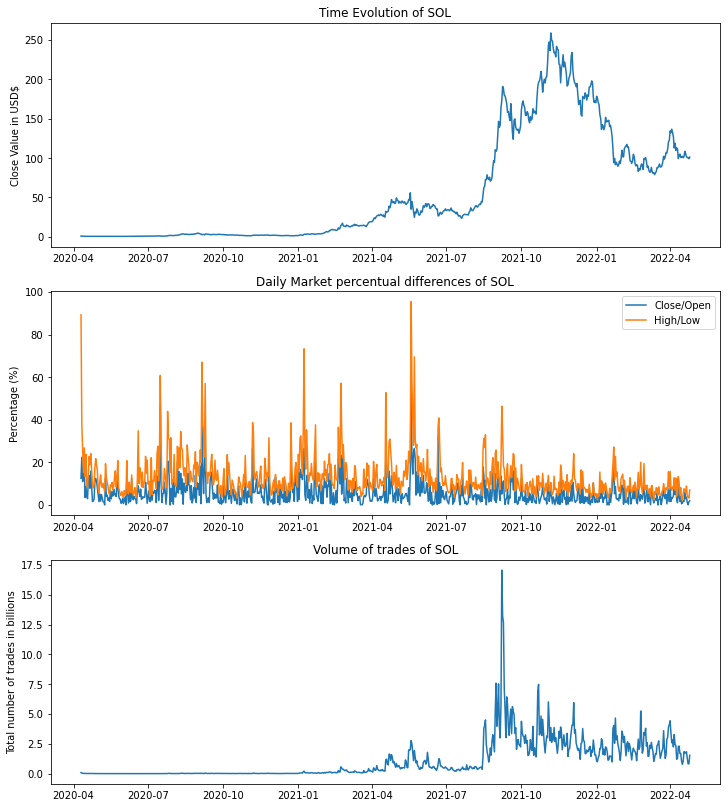

In [13]:
plot_coinValue(df)